# Creating a piechart from a csv file

First import pandas to create the dataframe and matplotlib for the charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Then create a variable for the location of the csv file with the data

In [2]:
remote_file = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

We only want to look at the column for the email address so add usecols to the read_csv command to limit the data.

Read in the csv file and use df.info() to look at the data

In [3]:
df = pd.read_csv(remote_file,  usecols=['Email'], dtype=str)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Email   1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


To create the piechart we need to split the domain name from the email addresses. I have added this information to a new column called domain.

In [7]:
df['Domain'] = df['Email'].str.split('@').str[1]
# df.insert(1,"Domain", df['Email'].str.split('@').str[1])

In [8]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Email   1000 non-null   object
 1   Domain  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
                           Email       Domain
0            pwarner@example.org  example.org
1  fergusonkatherine@example.net  example.net
2            fhoward@example.org  example.org
3          zjohnston@example.com  example.com
4               elin@example.net  example.net


Then we need this data plotted as a pie chart. The first step is to get the unique domain values.

In [50]:
unique_domain = df['Domain'].unique()
print(unique_domain)


['example.org' 'example.net' 'example.com']


Then this needs to be plotted as a pie chart

In [10]:
print(df.groupby('Domain').size())

Domain
example.com    339
example.net    320
example.org    341
dtype: int64


<Axes: title={'center': 'Percentage of email addresses of each domain'}>

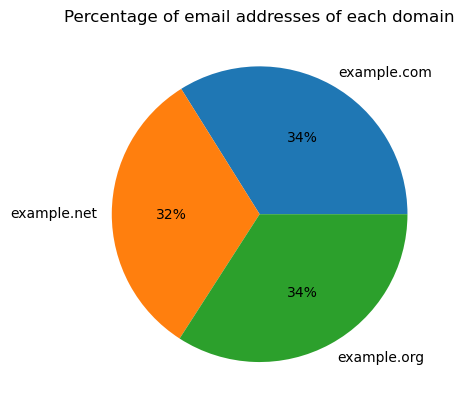

In [17]:
df.groupby('Domain').size().plot(kind='pie', autopct = '%1.0f%%', title="Percentage of email addresses of each domain")

To create a neater looking chart you can use explode to move the piechart pieces apart and start angle to rotate the piechart.

<Axes: title={'center': 'Percentage of email addresses of each domain'}>

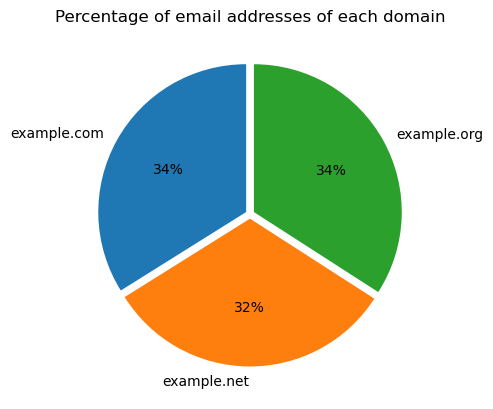

In [29]:
explode = (0.03,0.03,0.03)
df.groupby('Domain').size().plot(kind='pie', autopct = '%1.0f%%', explode= explode, startangle=90,title="Percentage of email addresses of each domain")